[[0.14219055]
 [0.3225882 ]]
Model je oblika y_hat = Theta0 + Theta1 * x
y_hat =  [0.14219055] + [[0.3225882]] *x
[[0.34366962]]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)

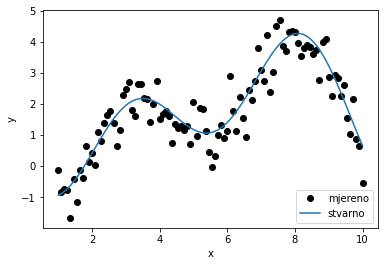

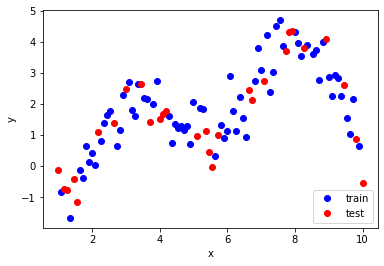

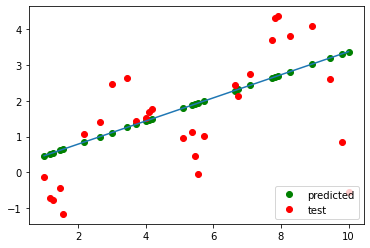

<Figure size 432x288 with 0 Axes>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error

def non_func(x):
	y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
	return y

def add_noise(y):
    np.random.seed(14)
    varNoise = np.max(y) - np.min(y)
    y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
    return y_noisy
def theta_parm(X,Y):
    theta=np.array([])
    x=np.array(X)
    y=np.array(Y)
    x_T=x.transpose()
    z=np.matmul(x_T,x)
    inv=np.linalg.inv(z)
    p=np.matmul(inv,x_T)
    theta=np.matmul(p,y)
    
    return theta
x = np.linspace(1,10,100)
y_true = non_func(x)
y_measured = add_noise(y_true)

plt.figure(1)
plt.plot(x,y_measured,'ok',label='mjereno')
plt.plot(x,y_true,label='stvarno')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)

np.random.seed(12)
indeksi = np.random.permutation(len(x))
indeksi_train = indeksi[0:int(np.floor(0.7*len(x)))]
indeksi_test = indeksi[int(np.floor(0.7*len(x)))+1:len(x)]

x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

xtrain = x[indeksi_train]
ytrain = y_measured[indeksi_train]

#zad 2.
to_be_added=np.ones((len(xtrain),1),dtype = float)
x_new = np.hstack((to_be_added,xtrain))
#print(x_new)
print(theta_parm(x_new,ytrain))

xtest = x[indeksi_test]
ytest = y_measured[indeksi_test]
#podaci se djela za na test i train
plt.figure(2)
plt.plot(xtrain,ytrain,'ob',label='train')
plt.plot(xtest,ytest,'or',label='test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc = 4)

linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)#trening

print('Model je oblika y_hat = Theta0 + Theta1 * x')
print('y_hat = ', linearModel.intercept_, '+', linearModel.coef_, '*x')#intercept=theta0, coef sve druge thete

ytest_p = linearModel.predict(xtest)#predviđanje za nove podatke
MSE_test = mean_squared_error(ytest, ytest_p)# srednja kvadratna pogreška

plt.figure(3)
plt.plot(xtest,ytest_p,'og',label='predicted')
plt.plot(xtest,ytest,'or',label='test')
plt.legend(loc = 4)

x_pravac = np.array([1,10])
x_pravac = x_pravac[:, np.newaxis]
y_pravac = linearModel.predict(x_pravac)
plt.plot(x_pravac, y_pravac)

#linearModel.fit(x_new,ytrain)#trening
#print('Model novi je oblika y_hat = Theta0 + Theta1 * x')
#print('y_hat = ', linearModel.intercept_, '+', linearModel.coef_, '*x')

#zadatak 3.
thetattt00 = np.matmul(np.linalg.inv(np.matmul(np.transpose(xtrain), xtrain)), np.transpose(xtrain))
thee = np.matmul(thetattt00, ytrain)
print(thee)

#zad3
theta_old = [[0.5], [0.5]]
alfa = 0.04

plt.figure(6)

for i in range(1000):
    h_theta = np.matmul(xtrain, theta_old)
    # print(h_theta.shape)
    # print(xtrain.shape)

    nesto = h_theta - ytrain
    nesto = np.transpose(nesto)

    deltaJ0 = (1/70) * np.sum(np.matmul(nesto, np.transpose(xtrain[:, 0])))
    deltaJ1 = (1/70) * np.sum(np.matmul(nesto, np.transpose(xtrain[:, 1])))

    thetha_new0 = theta_old[0] - alfa*deltaJ0
    thetha_new1 = theta_old[1] - alfa*deltaJ1

    theta_old[0] = thetha_new0
    theta_old[1] = thetha_new1

    plt.plot([0, 10], [theta_old[0], theta_old[1]*10+theta_old[0]])
    plt.pause(0.05)

    print(str(i) + ": " + str(theta_old))



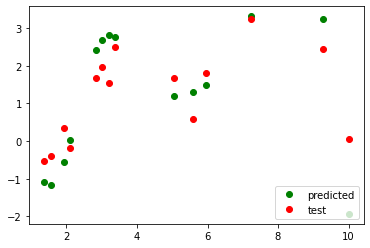

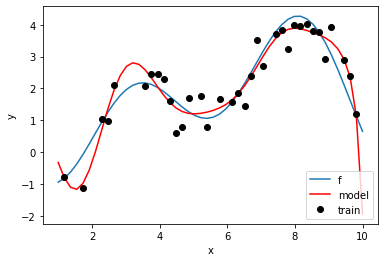

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

def non_func(x):
    y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
    return y

def add_noise(y):
    np.random.seed(14)
    varNoise = np.max(y) - np.min(y)
    y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
    return y_noisy
 
x = np.linspace(1,10,50)
y_true = non_func(x)
y_measured = add_noise(y_true)

x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

# make polynomial features
poly = PolynomialFeatures(degree=15)
xnew = poly.fit_transform(x)
    
np.random.seed(12)
indeksi = np.random.permutation(len(xnew))
indeksi_train = indeksi[0:int(np.floor(0.7*len(xnew)))]
indeksi_test = indeksi[int(np.floor(0.7*len(xnew)))+1:len(xnew)]

xtrain = xnew[indeksi_train,]
ytrain = y_measured[indeksi_train]

xtest = xnew[indeksi_test,]
ytest = y_measured[indeksi_test]

linearModel = lm.LinearRegression()
linearModel.fit(xtrain,ytrain)

ytest_p = linearModel.predict(xtest)
MSE_test = mean_squared_error(ytest, ytest_p)

plt.figure(1)
plt.plot(xtest[:,1],ytest_p,'og',label='predicted')
plt.plot(xtest[:,1],ytest,'or',label='test')
plt.legend(loc = 4)

#pozadinska funkcija vs model
plt.figure(2)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel.predict(xnew),'r-',label='model')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xtrain[:,1],ytrain,'ok',label='train')
plt.legend(loc = 4)


y_hat = [0.14214743] + [0.32259462] * x


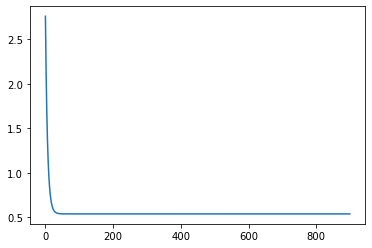

In [3]:
#3.
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
def non_func(x):
    y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
    return y
def add_noise(y):
    np.random.seed(14)
    varNoise = np.max(y) - np.min(y)
    y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
    return y_noisy

def line(x, theta):

    return theta[1]*x + theta[0]

def Jfunc(x,y,theta):
    J = 0.0
    n = x.shape[0]
    for i in range(0,n):
        J += (line(x[i],theta) - y[i]) ** 2

    J /= (2*n)

    return J

x = np.linspace(1,10,100)
y_true = non_func(x)
y_measured = add_noise(y_true)

np.random.seed(12)
indeksi = np.random.permutation(len(x))
indeksi_train = indeksi[0:int(np.floor(0.7*len(x)))]
indeksi_test = indeksi[int(np.floor(0.7*len(x)))+1:len(x)]

x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

xtrain = x[indeksi_train]
ytrain = y_measured[indeksi_train]

xtest = x[indeksi_test]
ytest = y_measured[indeksi_test]

#gradijenti spust

no_iter = 900
theta_old = np.zeros((2,1))
theta_new = np.zeros((2,1))
step = 0.05
J = np.zeros((no_iter,1))

plt.figure()

for i in range(0, no_iter):
    J[i] = Jfunc(xtrain,ytrain,theta_old)

    rj0 = 0.0
    rj1 = 0.0

    for i in range(0,len(xtrain)):
        rj0 += line(xtrain[i],theta_old) - ytrain[i]
        rj1 += (line(xtrain[i],theta_old) - ytrain[i]) * xtrain[i]

    rj0 /= len(xtrain)
    rj1 /= len(xtrain)

    theta_new[0] = theta_old[0] - step * rj0
    theta_new[1] = theta_old[1] - step * rj1
    theta_old = theta_new

plt.plot(range(0, no_iter), J)

print("y_hat = " + str(theta_new[0]) + " + " + str(theta_new[1]) + " * x")

MSE_test: [1.27450839 0.31157034 0.70390574]
MSE_train: [0.75796301 0.19556472 0.14480086]


Text(0, 0.5, 'y')

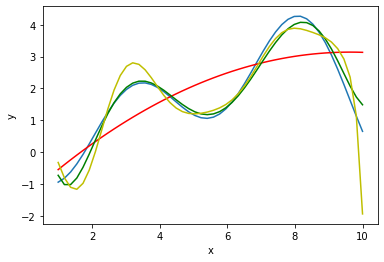

In [5]:
#5
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from numpy.linalg import inv
from sklearn.preprocessing import PolynomialFeatures

def non_func(x):
    y = 1.6345 - 0.6235*np.cos(0.6067*x) - 1.3501*np.sin(0.6067*x) - 1.1622 * np.cos(2*x*0.6067) - 0.9443*np.sin(2*x*0.6067)
    return y

def add_noise(y):
    np.random.seed(14)
    varNoise = np.max(y) - np.min(y)
    y_noisy = y + 0.1*varNoise*np.random.normal(0,1,len(y))
    return y_noisy

x = np.linspace(1,10,50)
y_true = non_func(x)
y_measured = add_noise(y_true)

x = x[:, np.newaxis]
y_measured = y_measured[:, np.newaxis]

# make polynomial features
poly1 = PolynomialFeatures(degree=2)
xnew1 = poly1.fit_transform(x)

poly2 = PolynomialFeatures(degree=6)
xnew2 = poly2.fit_transform(x)

poly3 = PolynomialFeatures(degree=15)
xnew3 = poly3.fit_transform(x)

np.random.seed(12)
indeksi1 = np.random.permutation(len(xnew1))
indeksi_train1 = indeksi1[0:int(np.floor(0.7*len(xnew1)))]
indeksi_test1 = indeksi1[int(np.floor(0.7*len(xnew1)))+1:len(xnew1)]

np.random.seed(12)
indeksi2 = np.random.permutation(len(xnew2))
indeksi_train2 = indeksi2[0:int(np.floor(0.7*len(xnew2)))]
indeksi_test2 = indeksi2[int(np.floor(0.7*len(xnew2)))+1:len(xnew2)]

np.random.seed(12)
indeksi3 = np.random.permutation(len(xnew3))
indeksi_train3 = indeksi3[0:int(np.floor(0.7*len(xnew3)))]
indeksi_test3 = indeksi3[int(np.floor(0.7*len(xnew3)))+1:len(xnew3)]

xtrain1 = xnew1[indeksi_train1,]
xtrain2 = xnew2[indeksi_train2,]
xtrain3 = xnew3[indeksi_train3,]
ytrain1 = y_measured[indeksi_train1]
ytrain2 = y_measured[indeksi_train2]
ytrain3 = y_measured[indeksi_train3]

xtest1 = xnew1[indeksi_test1,]
xtest2 = xnew2[indeksi_test2,]
xtest3 = xnew3[indeksi_test3,]
ytest1 = y_measured[indeksi_test1]
ytest2 = y_measured[indeksi_test2]
ytest3 = y_measured[indeksi_test3]

linearModel1 = lm.LinearRegression()
linearModel1.fit(xtrain1,ytrain1)

linearModel2 = lm.LinearRegression()
linearModel2.fit(xtrain2,ytrain2)

linearModel3 = lm.LinearRegression()
linearModel3.fit(xtrain3,ytrain3)

ytest_p1 = linearModel1.predict(xtest1)
ytest_p2 = linearModel2.predict(xtest2)
ytest_p3 = linearModel3.predict(xtest3)

ytrain_p1 = linearModel1.predict(xtrain1)
ytrain_p2 = linearModel2.predict(xtrain2)
ytrain_p3 = linearModel3.predict(xtrain3)

MSE_test = np.array([mean_squared_error(ytest1, ytest_p1),
mean_squared_error(ytest2, ytest_p2),
mean_squared_error(ytest3, ytest_p3)])

MSE_train = np.array([mean_squared_error(ytrain1, ytrain_p1),
mean_squared_error(ytrain2, ytrain_p2),
mean_squared_error(ytrain3, ytrain_p3)])


print("MSE_test: " + str(MSE_test))
print("MSE_train: " + str(MSE_train))

#pozadinska funkcija vs model
plt.figure(1)
plt.plot(x,y_true,label='f')
plt.plot(x, linearModel1.predict(xnew1),'r-',label='model1')
plt.plot(x, linearModel2.predict(xnew2),'g-',label='model2') #-najbolji?
plt.plot(x, linearModel3.predict(xnew3),'y-',label='model3')
plt.xlabel('x')
plt.ylabel('y')
#stupanj 6 najbolji